In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding = 'cp1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1589,ham,I love you. You set my soul on fire. It is not...,NaN,NaN,NaN
2771,ham,Then ur sis how?,NaN,NaN,NaN
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
4289,ham,"For you information, IKEA is spelled with all ...",NaN,NaN,NaN
5131,ham,That sucks. I'll go over so u can do my hair. ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df = df.iloc[:, 0:2]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Data Cleaning
# EDA
# Text Recognition
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

# Data Cleaning

In [8]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Target'] = le.fit_transform(df['Target'])

In [11]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

0

# EDA

In [15]:
df.Target.value_counts()

0    4516
1     653
Name: Target, dtype: int64

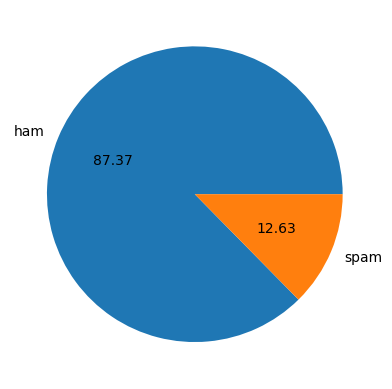

In [16]:
import matplotlib.pyplot as plt
plt.pie(df.Target.value_counts(), labels = ['ham','spam'], autopct = '%0.2f');

In [17]:
# data is imbalanced

In [18]:
df['num_characters'] = df['Text'].apply(len)

In [19]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
import nltk

In [21]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sent'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Target,Text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,Target,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

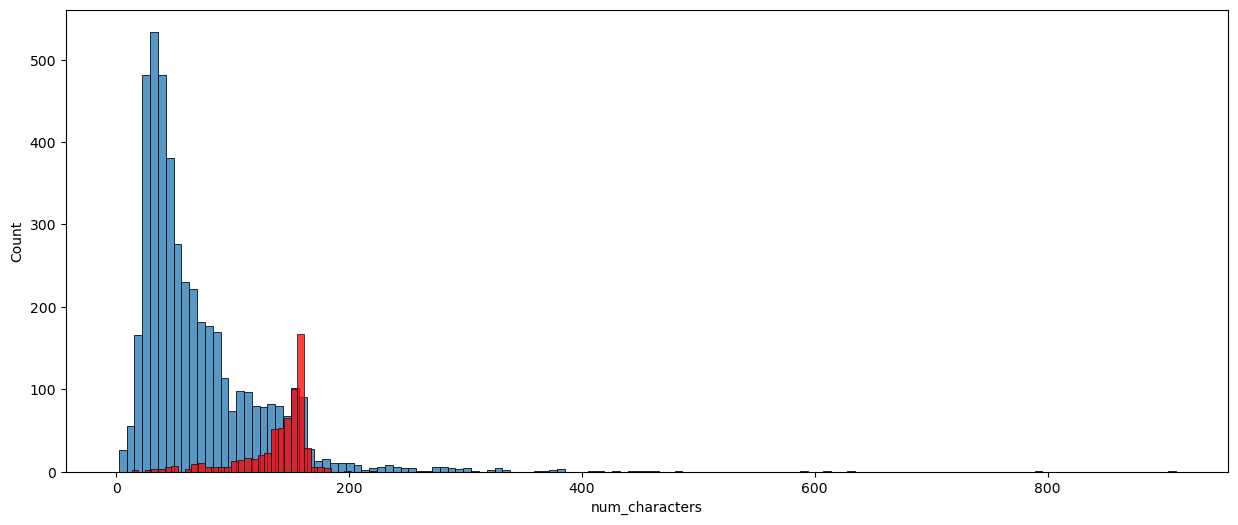

In [26]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'r')

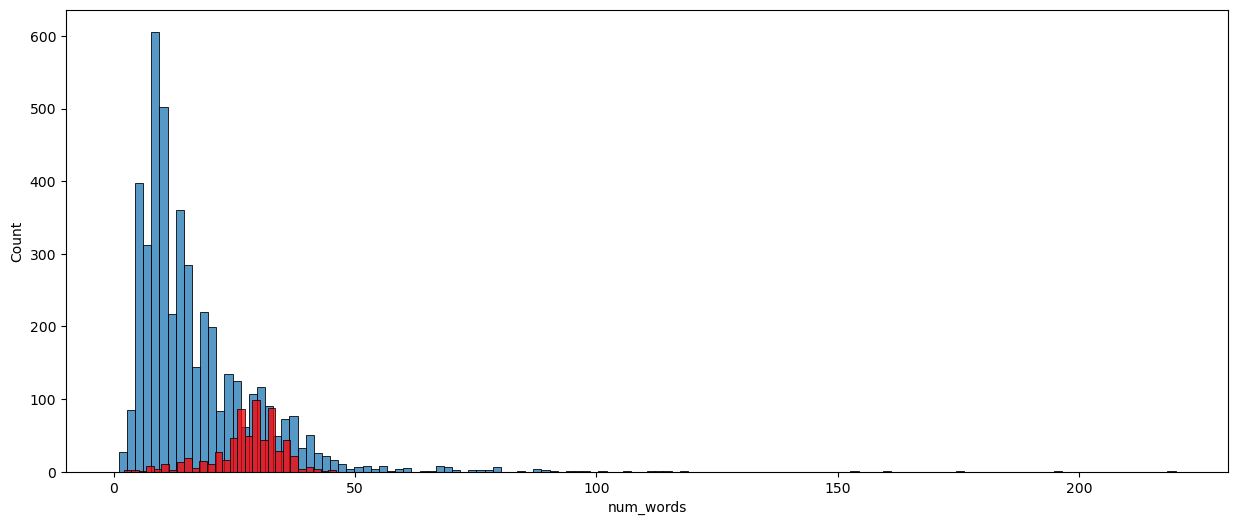

In [27]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'r');

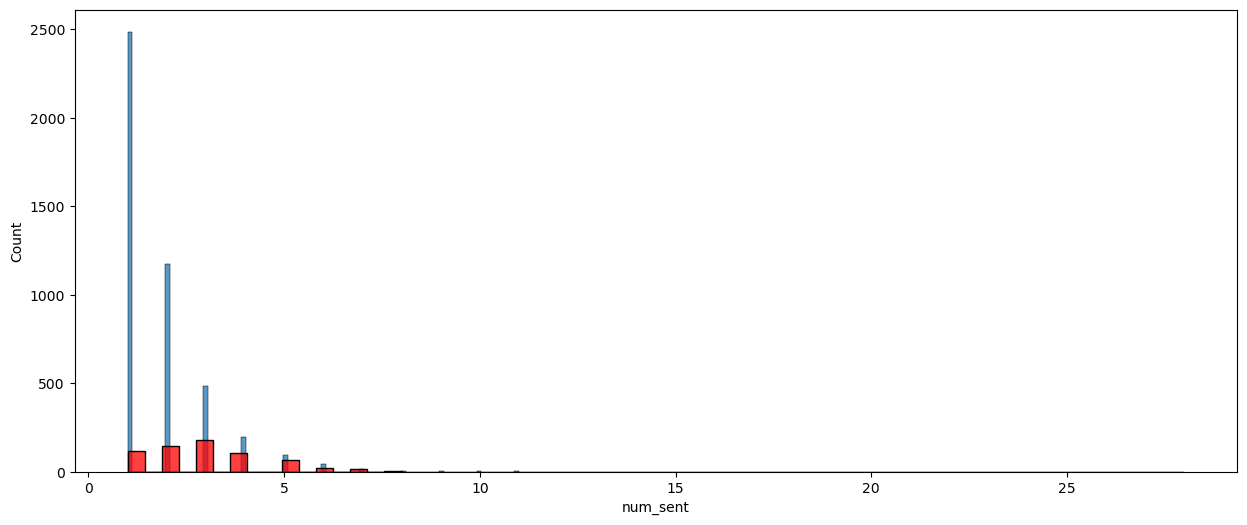

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['Target'] == 0]['num_sent'])
sns.histplot(df[df['Target'] == 1]['num_sent'], color = 'r');

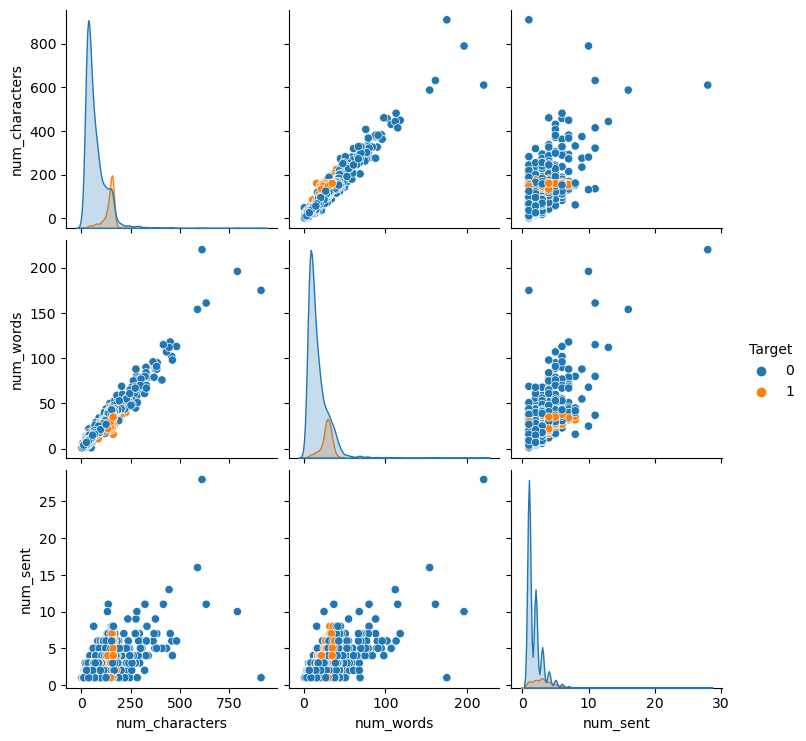

In [29]:
sns.pairplot(df, hue = 'Target');

<AxesSubplot:>

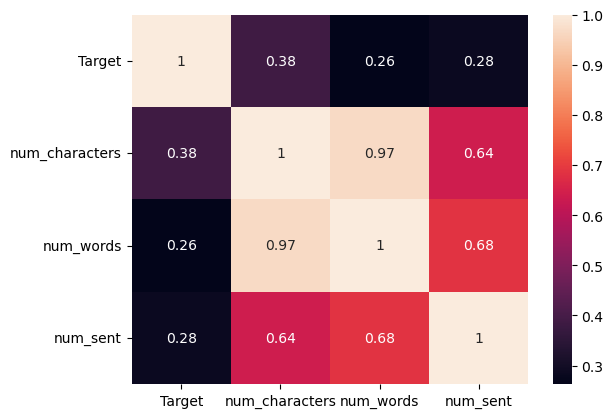

In [30]:
sns.heatmap(df.corr(), annot=True)

In [31]:
# Data Preprocessing
# # 1. Lowe case
# # 2. Tokenization
# # 3. Removing specail characters
# # 4. Removing stop words and punctuation
# # 5. stemming

In [32]:
import string
from nltk.corpus import stopwords
l1 = string.punctuation
l2 = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    y = [i for i in y if i not in l1 and i not in l2]
    return " ".join([ps.stem(x) for x in y])

In [34]:
df['transformed_text'] = df.Text.apply(transform_text)

In [35]:
from wordcloud import WordCloud

In [36]:
wc = WordCloud(width = 2000, height = 2000, min_font_size=10, background_color='white')

In [37]:
spam_wc = wc.generate(df[df.Target == 1]['transformed_text'].str.cat(sep = " "))

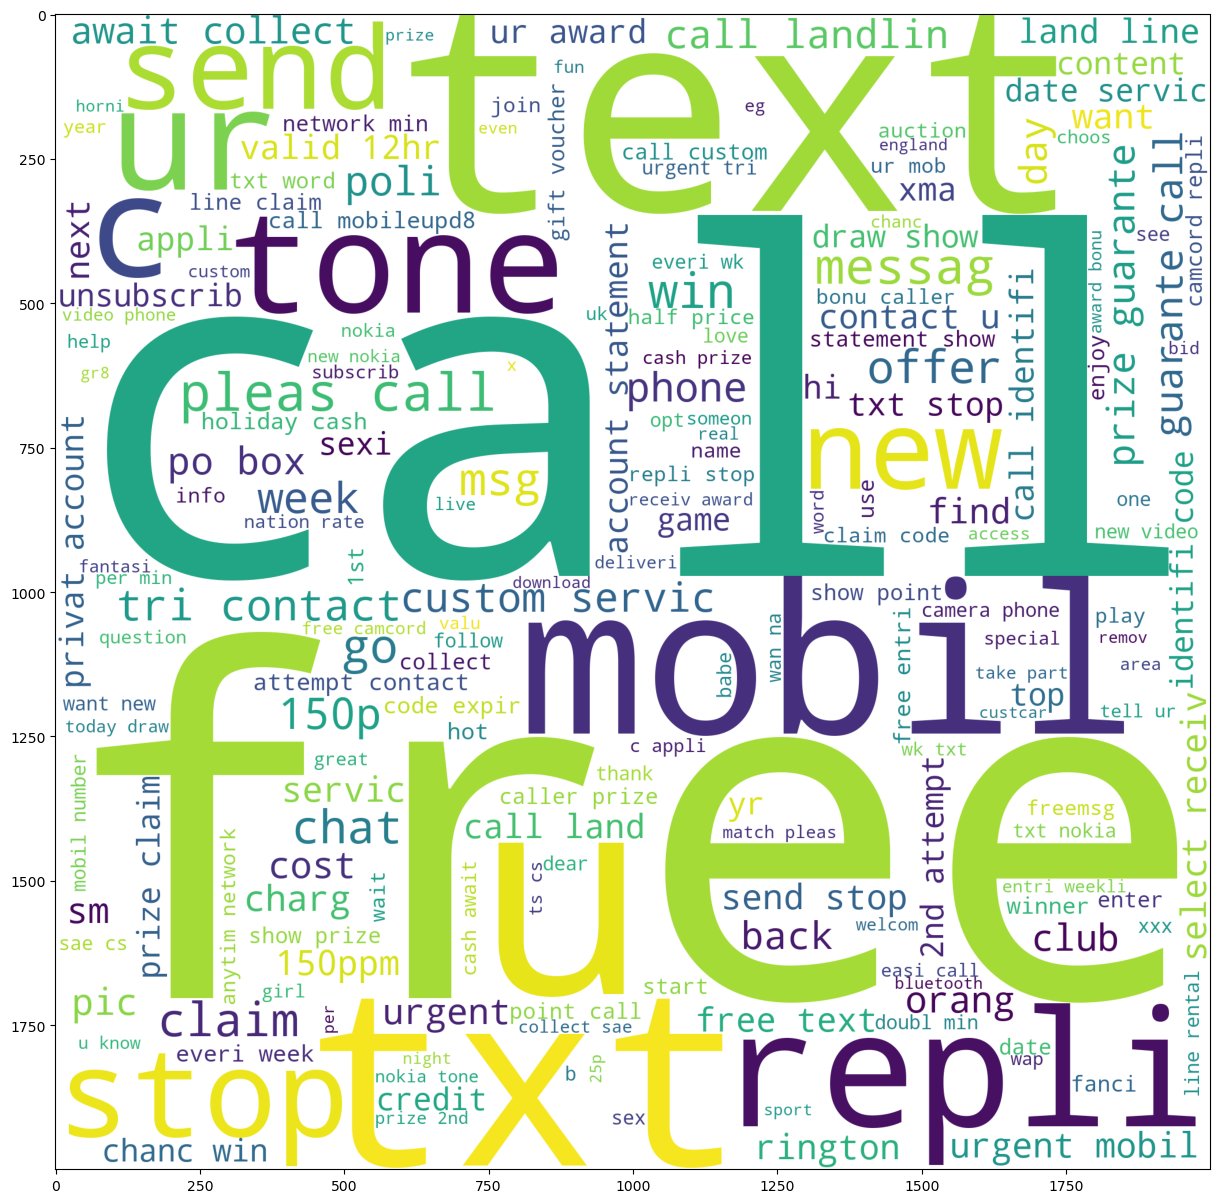

In [39]:
plt.figure(figsize = (15,15))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df.Target == 0]['transformed_text'].str.cat(sep = " "))

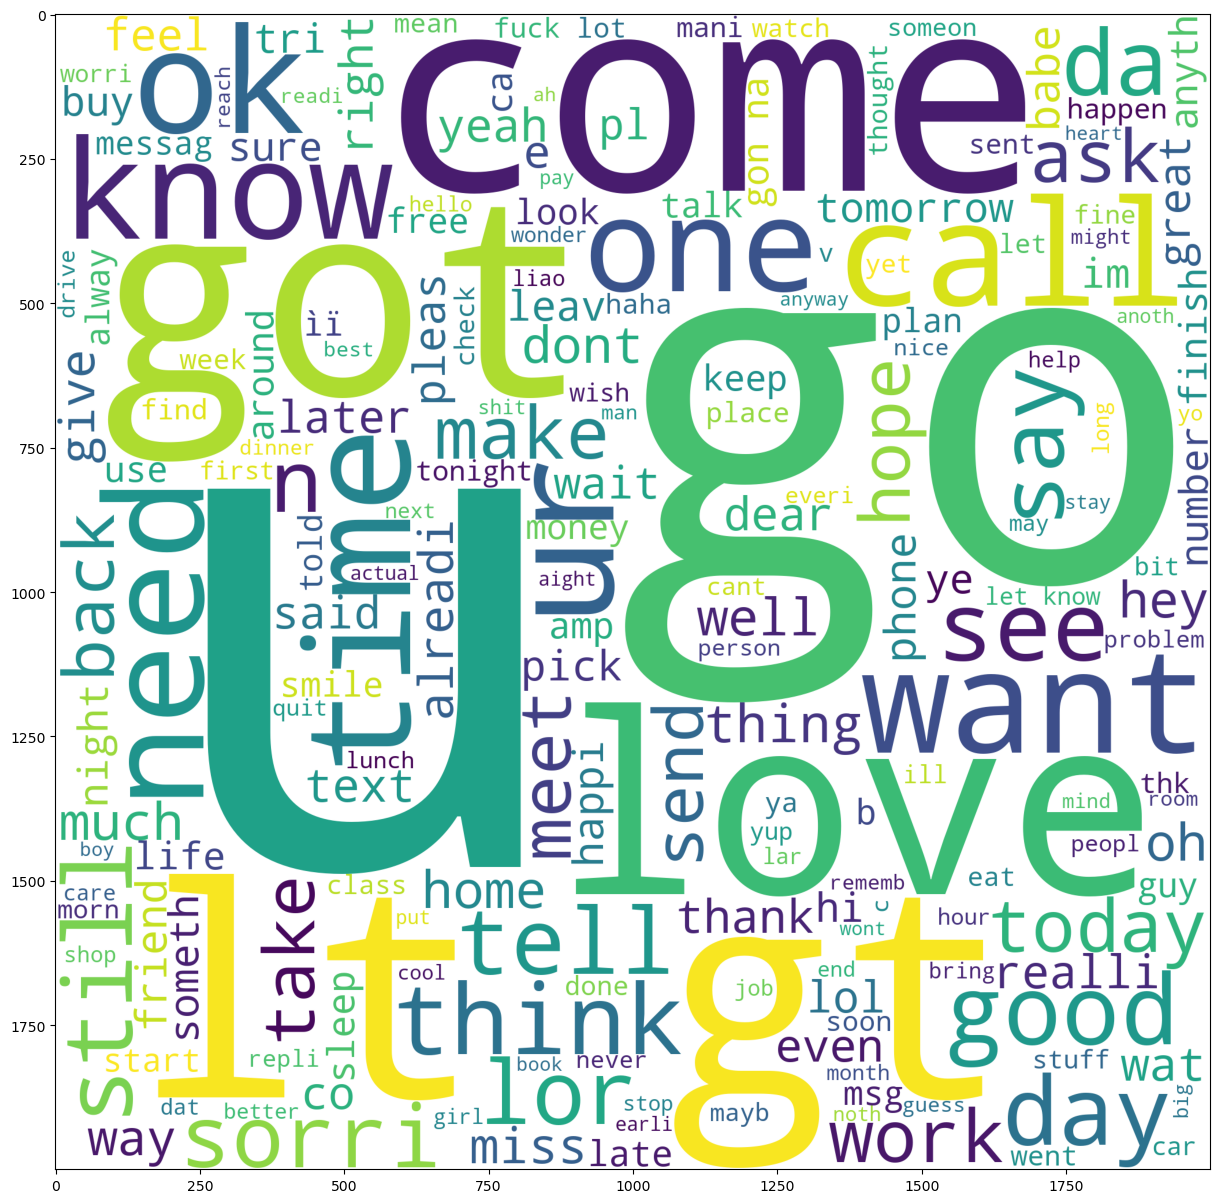

In [41]:
plt.figure(figsize = (15,15))
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for message in df[df.Target == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


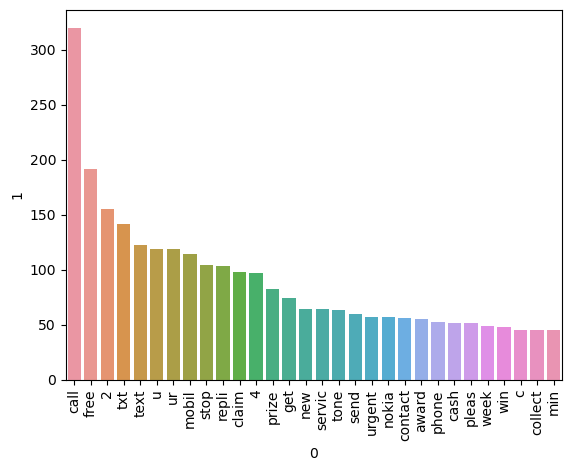

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show();

In [44]:
ham_corpus = []
for message in df[df.Target == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


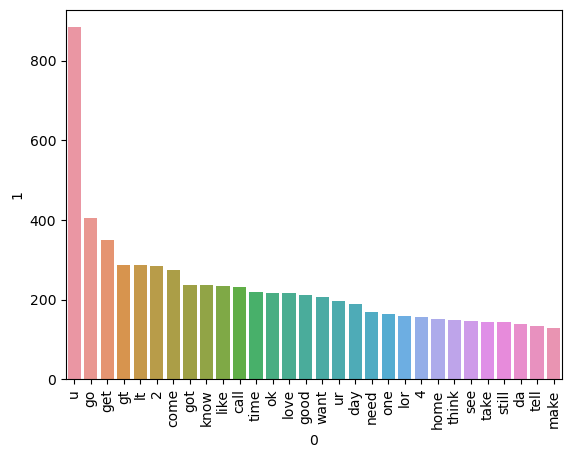

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show();

# Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [85]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=10000)

In [86]:
# x = cv.fit_transform(df['transformed_text']).toarray()
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [87]:
x.shape

(5169, 6708)

In [88]:
y = df.Target.values

In [89]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2)

In [92]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [93]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [94]:
gnb.fit(train_x, train_y)
pred_gnb = gnb.predict(test_x)
print(accuracy_score(test_y, pred_gnb))
print(precision_score(test_y, pred_gnb))
print(confusion_matrix(test_y, pred_gnb))

0.8617021276595744
0.48945147679324896
[[775 121]
 [ 22 116]]


In [95]:
mnb.fit(train_x, train_y)
pred_mnb = mnb.predict(test_x)
print(accuracy_score(test_y, pred_mnb))
print(precision_score(test_y, pred_mnb))
print(confusion_matrix(test_y, pred_mnb))

0.9477756286266924
1.0
[[896   0]
 [ 54  84]]


In [96]:
bnb.fit(train_x, train_y)
pred_bnb = bnb.predict(test_x)
print(accuracy_score(test_y, pred_bnb))
print(precision_score(test_y, pred_bnb))
print(confusion_matrix(test_y, pred_bnb))

0.9613152804642167
0.99
[[895   1]
 [ 39  99]]


In [97]:
# tfidf with mnb

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [99]:
lrc = LogisticRegression()
svc = SVC(kernel='sigmoid', gamma = 1.0)
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bg = BaggingClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgbc = XGBClassifier(n_estimators=50, random_state=2)

In [100]:
dict = {'lrc':lrc, 'svc':svc, 'dtc':dtc, 'rfc':rfc, 'knc':knc, 'abc':abc, 'etc':etc, 'bg':bg, 'gbc':gbc, 'xbgc':xgbc, 'mnb':mnb}

In [101]:
def train_classifier(model):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    accuracy = accuracy_score(test_y, pred)
    precision = precision_score(test_y, pred)
    return accuracy, precision

In [102]:
accuracy1 = []
precision1 = []

for i, j in dict.items():
    accuracy, precision = train_classifier(j)
    accuracy1.append(accuracy)
    precision1.append(precision)
    
l = pd.DataFrame()
l['models'] = dict.keys()
l['accuracy'] = accuracy1
l['precision'] = precision1
l

,models,accuracy,precision
0,lrc,0.939072,1.000000
1,svc,0.955513,0.979167
2,dtc,0.927466,0.862069
3,rfc,0.953578,1.000000
4,knc,0.898453,1.000000
5,abc,0.946809,0.936842
6,etc,0.963250,0.980769
7,bg,0.947776,0.896226
8,gbc,0.939072,0.962963
9,xbgc,0.955513,0.960000


In [103]:
dict.keys()

dict_keys(['lrc', 'svc', 'dtc', 'rfc', 'knc', 'abc', 'etc', 'bg', 'gbc', 'xbgc', 'mnb'])